In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Download MNIST dataset
train_dataset = datasets.MNIST(
    root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(
    root='./data', train=False, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 9912422/9912422 [00:03<00:00, 2683192.69it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 139942.25it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 1648877/1648877 [00:01<00:00, 1382439.50it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 1027813.80it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([1, 28, 28])
5


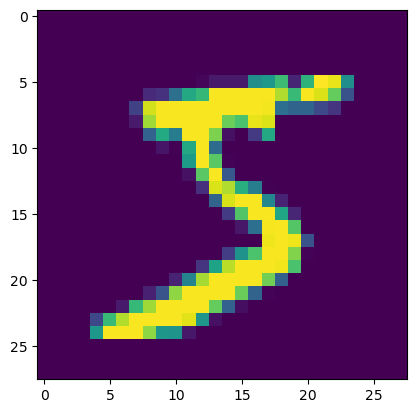

In [2]:
image, label = train_dataset[0] # sample
print(image.shape)
print(label)
import matplotlib.pyplot as plt
plt.imshow(image.squeeze())

In [4]:
import torch
import torch.nn as nn #nurun network
import torch.optim as optim
# Data preparation
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32) #입력은 2차원
y_and = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32) #출력은 1차원

In [5]:
# Define Perceptron model
class Perceptron(nn.Module):
    def __init__(self): #nn에 들어갈 요소들을 정의
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(2, 1) #입력은 2차원 출력은 1차원
        self.sigmoid = nn.Sigmoid() #Sigmoid: 활성화 함수
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))
    
# Training AND operation
model_and = Perceptron() #실체화
criterion = nn.BCELoss() #Binary Cross-Entropy 목적함수, 손실함수
optimizer_and = optim.SGD(model_and.parameters(), lr=0.1) #Stochastic gradient descent
#모델의 파라미터들, lr: learning rate
for epoch in range(1000):
    optimizer_and.zero_grad()
    output = model_and(X)
    loss = criterion(output, y_and)
    loss.backward()
    optimizer_and.step()
    
# Testing the results
print(model_and(X).round())

tensor([[0.],
        [0.],
        [0.],
        [1.]], grad_fn=<RoundBackward0>)


In [7]:
# Data preparation 변한것 없이 label변경 
#OR연산
y_or = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

# Training OR operation
model_or = Perceptron()
optimizer_or = optim.SGD(model_or.parameters(), lr=0.1)
for epoch in range(1000):
    optimizer_or.zero_grad()
    output = model_or(X)
    loss = criterion(output, y_or)
    loss.backward()
    optimizer_or.step()
    
# Testing the results
print(model_or(X).round())

tensor([[0.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)


In [9]:
# Data preparation
#XOR연산
#직선 하나(선형)로 검정과 흰색을 나눌 수가 없음

y_xor = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Training XOR operation
model_xor = Perceptron()
optimizer_xor = optim.SGD(model_xor.parameters(), lr=0.1)

for epoch in range(1000):
    optimizer_xor.zero_grad()
    output = model_xor(X)
    loss = criterion(output, y_xor)
    loss.backward()
    optimizer_xor.step()
    
# Testing the results
print(model_xor(X).round())

#분류가 잘 안되고 있음
#1층짜리 퍼셉트론은 선형 분류기와 같다 -> XOR 연산자를 할 수 없음

tensor([[0.],
        [0.],
        [0.],
        [1.]], grad_fn=<RoundBackward0>)


In [10]:
# Define MLP model
#MLP를 이용한 XOR연산

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, 2) # input -> hidden
        self.output = nn.Linear(2, 1) # hidden -> output
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.sigmoid(self.hidden(x)) #relu, gelu 등의 다양한 것들 있음
        x = self.sigmoid(self.output(x)) #self.relu = nn~~
        return x
# Training XOR again
model_xor = MLP()
optimizer_xor = optim.SGD(model_xor.parameters(), lr=0.1)

for epoch in range(15000): #epoch 늘려놓음
    optimizer_xor.zero_grad()
    output = model_xor(X)
    loss = criterion(output, y_xor)
    loss.backward()
    optimizer_xor.step()
    
# Testing the results
print(model_xor(X).round())

#분류 성공

#사람이 고양이와 개를 구분할 때 코만 눈만 보고 구분하지 않음 -> 비선형

tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)


![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202024-08-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.49.56.png]

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
# Set hyperparameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Load MNIST dataset and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))
])
    
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
# Set hyperparameters
input_size = 784 # 28x28 2차원을 1차원으로 핌
hidden_size = 500
num_classes = 10
num_epochs = 5 #다시 보는 횟수
batch_size = 100 #묶는 단위 그냥 100으로 함 컴퓨터 사양 좋으면 크게 해도 문제 없음
learning_rate = 0.001 #다시 볼 때마다 순서를 섞는것. 
#순서를 외워서 할 수 있어서 섞어 줘야됨 -> 딥러닝 모델이 암기를 못하게 끔 -> 속도가 더 빨라짐

# Load MNIST dataset and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))
])
    
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define MLP Model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU() # instead of Softmax
        self.fc2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = MLP(input_size, hidden_size, num_classes)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # instead of SGD

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Vectorize the MNIST image
        images = images.reshape(-1, input_size)
        # Forward-propagation
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Back-propagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
if (i+1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], '
        f'Step [{i+1}/{total_step}], '
        f'Loss: {loss.item():.4f}')
    
# Testing the trained model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

Epoch [5/5], Step [600/600], Loss: 0.0660
Accuracy: 97.8%


In [22]:
import torch.nn.init as init

class MLP(nn.Module):
    def__init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
        # Xavier initialization
        self.xavier_init_weights()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

    def xavier_init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    init.constant_(m.bias, 0)
                    
model = MLP(input_size, hidden_size, num_classes)

SyntaxError: invalid syntax (1891123051.py, line 3)